# Байесовская статистика
## Задание BS.4


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---

**Баллы за задание:**

* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 40 баллов
* Задача 3 &mdash; 20 баллов
* Задача 4 &mdash; 30 баллов
* Задача 5 &mdash; 70 баллов
---

In [156]:
# Bot check

# HW_ID: ds_bs4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

__________________
### Задача 1.

Рассмотрим равномерное распределение на $A \subset \mathbb{R}^2$. Множество $A$ показано на рисунке закрашенными областями. Опишите процесс генерации выборки из этого распределения по схеме Гиббса или покажите, что это невозможно.

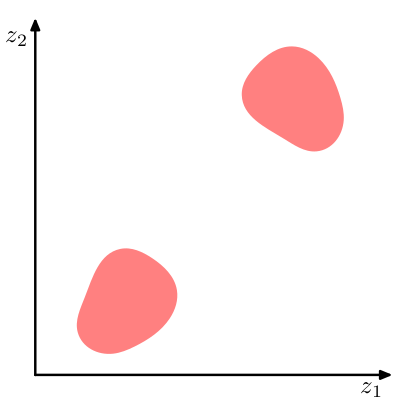

**Решение:**

$\square$

Пусть $X^1 = (X_1^1, X_2^1)$ -- начальная выборка из A.

Обозначим множества в порядке слева направо как $A_1$ и $A_2$.

Тогда плотность имеет вид: $p(x) = \frac{I(x \in A_1 \cup A_2)}{\mu(A_1) + \mu(A_2)}$

Путь $X^1$ лежит в $A_1$.

Найдем маргинальную плотность

\begin{aligned}
    p(x_2) &= \frac{1}{\mu(A_1) + \mu(A_2)} \int_{A} I\left( (x_1, x_2) \in A_1 \cup A_2 \right) \, dx_1 \\
    &= \frac{\mu(\{x_1 :  (x_1, x_2) \in A_1 \cup A_2\}) }{\mu(A_1) + \mu(A_2)}
\end{aligned}

Тогда условная плотность имеет вид:
\begin{aligned}
    p(x_1|x_2) = \frac{p(x_1, x_2)}{p(x_2)} &= \frac{\frac{I((x_1, x_2) \in A_1 \cup A_2)}{\mu(A_1) + \mu(A_2)}}{\frac{\mu(\{x_1 :  (x_1, x_2) \in A_1 \cup A_2\}) }{\mu(A_1) + \mu(A_2)}} \\
    &= \frac{I((x_1, x_2) \in A_1 \cup A_2)}{\mu(\{x_1: (x_1, x_2) \in A_1 \cup A_2\})}
\end{aligned}


Отсюда видим, что если мы попали в $A_1$, то вероятность попасть в $A_2$ равна нулю, так как их проекции не пересекаются.

Значит метод Гиббса будет генерировать элементы только из $A_1$, что не является равномерной выборкой на А.

**ОТВЕТ: НЕТ**

$\blacksquare$


In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt

import pymc as pm
from functools import partial

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

sns.set(style='darkgrid', font_scale=1.3, palette='Set2')
print('PyMC v{}'.format(pm.__version__))

from tqdm.notebook import tqdm

PyMC v5.22.0


---
### Задача 2.

Дано распределение на $\mathbb{R}^2$ с плотностью
$$p(x, y) = c\:\frac{\left|\sin(x+y)\right|\:\exp\left(-\left.|x|\right/10+\cos y\right)}{1+\left.|xy|\right/10},$$

где $c\in \mathbb{R}_+$ &mdash; некоторое число.

Сгенерируйте из него выборку размера $n=2000$ с помощью
* метода Rejection sampling,
* схемы Метрополиса-Хастингса.

В каждом случае нарисуйте ядерную оценку плотности полученной выборки и сравните ее с истинной плотностью.

<font color="red"><b>Замечания:</b></font>
    
1. Вместо $\mathbb{R}^2$ можно рассматривать только квадрат $[-10, 10]^2$.
2. Учтите, что схема Метрополиса-Хастингса требует настройки цепи на начальных итерациях, то есть около 1000 первых итераций необходимо отбросить. Кроме того, если требуется сгенерировать именно выборку, в которой элементы независимы, из полученной траектории стоит брать каждый $k$-й элемент, где $k$ хотя бы 10.
3. При сравнении методов учтите, что метод Rejection sampling может отвергать точки, в то время как в схеме Метрополиса-Хастингса точка добавляется на каждой итерации (повторяется или берется новая).
4. Процедуры семплирования необходимо реализовать самостоятельно.

По сгенерированной выборке оцените для данного распределения математическое ожидание и матрицу ковариаций.

In [158]:
def visualize_distribution(samples, labels, title="Распределение выборок", alpha=0.5):
    if len(samples) != len(labels):
        raise ValueError("Количество выборок должно быть равно количеству меток.")

    plt.figure(figsize=(10, 6))

    for sample, label in zip(samples, labels):
        x = np.array([s[0] for s in sample])
        y = np.array([s[1] for s in sample])
        density_values = np.array([s[2] for s in sample])

        sns.kdeplot(x=x, y=y, fill=True, alpha=alpha, label=label)

        x_grid, y_grid = np.meshgrid(
            np.linspace(x.min(), x.max(), int(len(x) ** 0.5)),
            np.linspace(y.min(), y.max(), int(len(y) ** 0.5)),
        )

        z_grid = np.array([density_values[i] for i in range(len(sample))])
        z_grid = z_grid.reshape(x_grid.shape)

        plt.contourf(y_grid, x_grid, z_grid, levels=10, alpha=alpha)
    plt.colorbar()
    plt.title(title, fontsize=16)
    plt.xlabel("x", fontsize=12)
    plt.ylabel("y", fontsize=12)
    plt.grid(True)
    plt.legend()

    plt.show()

In [159]:
def plot_2d_density(data, cmap="Blues", thresh=0.1, title="Density Plot"):
    if data.shape[1] != 2:
        raise ValueError("Данные должны быть размерности (n_samples, 2), т.е. пара точек (x, y).")

    sns.kdeplot(x=data[:, 0], y=data[:, 1], cmap=cmap, fill=True, thresh=thresh)

    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim([-15, 15])
    plt.ylim([-15, 15])
    plt.show()

In [160]:
def task_density(x, y, c):
    numerator = c * (np.abs(np.sin(x + y)) * np.exp(-np.abs(x) / 10 + np.cos(y)))
    denominator = 1 + np.abs(x * y) / 10

    return numerator / denominator

def generate_sample(n, c, density=None):
    result = []
    grid_x = np.linspace(-10, 10, n)
    grid_y = np.linspace(-10, 10, n)
    for x in tqdm(grid_x):
        for y in grid_y:
            if density is None:
                result.append([x, y, task_density(x, y, c)])
            else:
                result.append([x, y, density([x, y])])

    return np.array(result)

In [161]:
c = 1
n = int(np.sqrt(2048))

sample = generate_sample(n, c)
len(sample)

  0%|          | 0/45 [00:00<?, ?it/s]

2025

/tmp/ipykernel_34432/1757801492.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


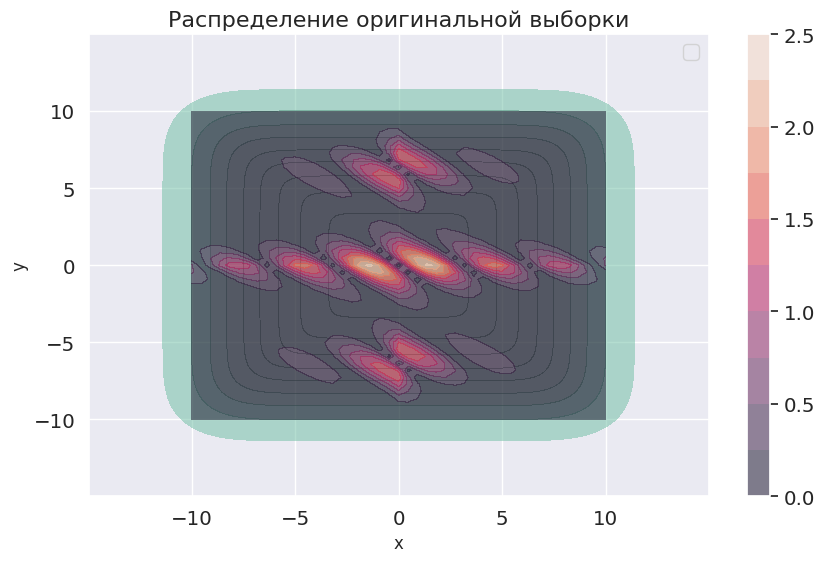

In [162]:
visualize_distribution(
    [sample],
    ["Оригинальная выборка"],
    title="Распределение оригинальной выборки",
    alpha=0.5,
)

In [163]:
expectation = np.mean(sample[:, 0:2] * sample[:, 2:3], axis=0)
print(f"Мат ожидание: {expectation.round(3)}")

Мат ожидание: [ 0. -0.]


In [164]:
def weighted_covariance(X, w):
    w = w.reshape(-1, 1)
    w_norm = w / np.sum(w)
    mean = np.sum(X * w_norm, axis=0, keepdims=True)
    X_centered = X - mean
    cov_matrix = (w_norm * X_centered).T @ X_centered
    return cov_matrix

cov = weighted_covariance(sample[:, 0:2], sample[:, 2:3])
print("Ковариационная матрица:\n", cov)

Ковариационная матрица:
 [[18.25457047  0.07550094]
 [ 0.07550094 21.24858071]]


1) Rejection sampling

In [ ]:
std = 10
rejection_distr = sps.multivariate_normal(mean=[0, 0], cov=[[std, 0], [0, std]])
rejection_sample = generate_sample(n, c, rejection_distr.pdf)

  0%|          | 0/45 [00:00<?, ?it/s]

Проверим выполнение условий

In [166]:
np.all(2e4 * rejection_sample[:, 2] > sample[:, 2])

True

Видим, что подходит константа:

In [167]:
rej_const = 2e4

In [168]:
def rejection_sampling(n, q, p, c, rej_const):
    sample = []
    M = rej_const
    while len(sample) < n**2:
        print(f"sample size: {len(sample)}", end="\r")
        y = q.rvs(size=1)
        if not (-10 < y[0] and y[0] < 10 and -10 < y[1] and y[1] < 10):
            continue
        q_y = q.pdf(y)
        p_y = p(*y, c)
        
        # Вычисление alpha
        alpha = p_y / (M * q_y)
        if alpha > 1:
            continue

        u = np.random.uniform(0, 1)
        if u <= alpha:
            sample.append([*y])
    return np.array(sample)

In [169]:
rejection_sample = rejection_sampling(n, rejection_distr, task_density, c, rej_const)

In [170]:
rej_density = task_density(rejection_sample[:, 0], rejection_sample[:, 1], c)

In [171]:
rej_expectation = np.mean(rejection_sample[:, 0:2] * rej_density.reshape(-1, 1), axis=0)
print(f"Матожидание Rejecting sampling:{rej_expectation.round(3)}")
cov = weighted_covariance(rejection_sample[:, 0:2], rej_density.reshape(-1, 1))
print("Ковариационная матрица:\n", cov.round(3))

Матожидание Rejecting sampling:[-0.033 -0.042]
Ковариационная матрица:
 [[1.1047e+01 1.5000e-02]
 [1.5000e-02 1.5824e+01]]


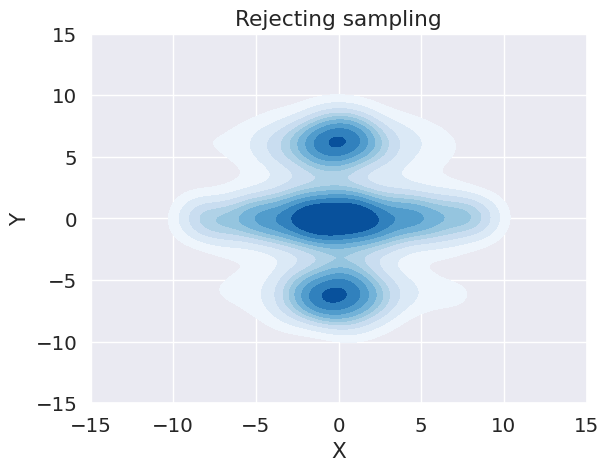

In [172]:
plot_2d_density(rejection_sample, title="Rejecting sampling")

Видим, что ядерная оценка закрышивает промежуток по горизонтали, которого нет в оригинальном распределении.

2. Метод Метрополиса-Хатчиса.

В качестве апостериорного возьмем стандартное нормальное многомерное распределение.

In [173]:
def Metropolis_Hastings(n, p, c):
    warm_iterations = 1000
    sample = []
    counter = 0
    x_prev = [0, 0]
    cov = [[1, 0], [0, 1]]
    while len(sample) < n**2:
        print(f"conuter: {len(sample)} / {n ** 2}", end="\r")

        y = sps.multivariate_normal(mean=x_prev, cov=cov).rvs(size=1)

        numerator = sps.multivariate_normal(mean=y, cov=cov).pdf(x_prev) * p(*y, c)
        denominator = (
            sps.multivariate_normal(mean=x_prev, cov=cov).pdf(y) * p(*x_prev, c) + 1e-15
        )
        fraction = numerator / denominator
        prob = np.random.binomial(n=1, p=np.min([1, fraction]))
        if prob == 1:
            x_prev = y
        counter += 1

        if counter > warm_iterations and np.all(np.abs(x_prev) < 10):
            sample.append(x_prev)
    return np.array(sample)

In [174]:
MH_sample = Metropolis_Hastings(n*2, task_density, c)

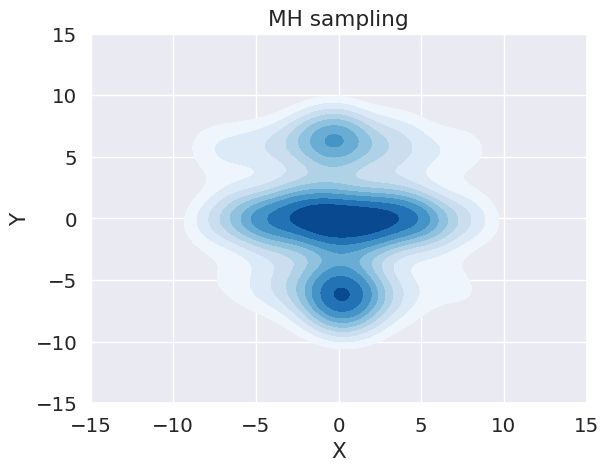

In [175]:
plot_2d_density(MH_sample[::10], title="MH sampling")

In [176]:
MH_density = task_density(MH_sample[:, 0], MH_sample[:, 1], c)

MH_expectation = np.mean(MH_sample[:, 0:2] * MH_density.reshape(-1, 1), axis=0)
print(f"Матожидание MH sampling: {MH_expectation.round(3)}")

MH_cov = weighted_covariance(MH_sample[:, 0:2], MH_density.reshape(-1, 1))
print("Ковариационная матрица:\n", MH_cov.round(3))

Матожидание MH sampling: [ 0.065 -0.139]
Ковариационная матрица:
 [[ 9.968 -0.292]
 [-0.292 15.302]]


Видим, что распределение почти совпадает с исходным. 

**Вывод**

Нам удалось добиться хорошего совпадения для Rejecting sampling и Метрополиса-Хастингса.

Благодоря отвержениям в Rejecting sampling выборка получилась чуть лучше.

---
### Задача 3.

Для описанных ниже задач опишите математическую модель, постройте ее с помощью PyMC и ответьте на вопросы, используя семплирование.

1. Будем считать, что количество забитых голов некоторой команды в футбольном матче имеет пуассоновское распределение с параметром $\lambda$. На этот параметр задано априорное распределение $\Gamma(1.4, 1)$.

  За первый матч команде удалось забить 4 гола. Оцените апостериорный параметр $\lambda$. Какова вероятность того, что в следующем матче голов будет не меньше?

In [177]:
with pm.Model() as model:
    lambda_ = pm.Gamma("lambda", alpha=1.4, beta=1)
    obs = pm.Poisson("goals", mu=lambda_, observed=4)
    
    trace = pm.sample(1000, tune=500, cores=4, random_seed=42)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda]


Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 5 seconds.


In [178]:
lambda_samples = trace.posterior["lambda"].values.flatten()
probs = 1 - sps.poisson.cdf(3, mu=lambda_samples)
estimate = probs.mean()
print(f"Вероятность забить не меньше 4 голов: {estimate:.3f}")

Вероятность забить не меньше 4 голов: 0.286


2. Хотим посчитать количество медведей в лесу. Сначала поймали 23, поставили метку и отпустили. Через какое-то время поймали 19 медведей, из которых с меткой оказалось 4. Какое апостериорное распределение параметра &mdash; числа медведей?

  В качестве априорного используйте равномерное распределение на отрезке от 50 до 500

*Замечание:* https://en.wikipedia.org/wiki/Hypergeometric_distribution

In [179]:
with pm.Model() as second_model:
    uniform_aprior = pm.DiscreteUniform("N", lower=50, upper=500)
    catched = pm.HyperGeometric("Bears", N=uniform_aprior, k=23, n=19, observed=4)

    trace = pm.sample(1000, tune=500, cores=4, random_seed=42)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [N]


Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 3 seconds.


In [180]:
mean_bears = np.mean(trace.posterior["N"].values)
print(f"Среднее число медведей: {mean_bears:.2f}")

# 95% доверительный интервал (апостериорный)
ci_lower, ci_upper = np.percentile(trace.posterior["N"].values, [2.5, 97.5])
print(f"95% доверительный интервал: [{ci_lower}, {ci_upper}]")

Среднее число медведей: 172.27
95% доверительный интервал: [69.0, 405.0]


<Axes: title={'center': 'N'}>

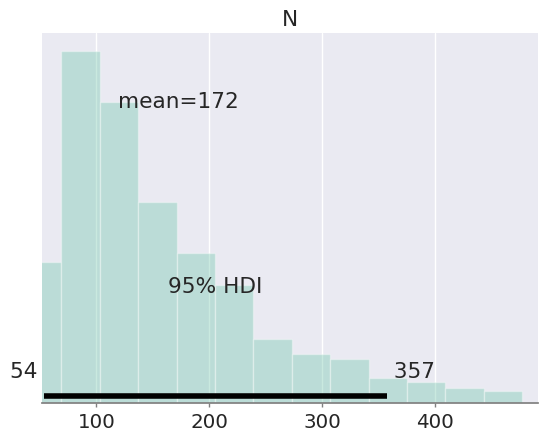

In [181]:
pm.plot_posterior(trace, linewidth=2, hdi_prob=0.95)

**Выводы:**

При помощи PyMC мы решили задачи, на которые иначе пришлось бы потратить достаточно много времени. Также хочется отметить удобство его использования

----

### Задача 4.

На занятии мы посмотрели на зависимость апостериорной вероятности $\mathsf{P}(\theta_1 < \theta_2\ |\ X, Y)$ от истинного эффекта. Исследуйте, как эта вероятность меняется при изменении размера выборки. Начиная с какого размера выборки эта вероятность становится больше 80% при истинном относительном эффекте 5%?

In [182]:
def bayesian_testing(
    prior_distr,
    sample_distr, shift_parameter,
    sample_x, sample_y,
    trace_size=2000, tune_size=500, cores_count=4,
    draw_trace=True, draw_posterior=True,
    returns=[]
    ):
    '''
    :param prior_distr: априорное распределение theta, функция со свободным параметром name
    :param sample_distr: распределение выборки, функция со свободными параметрами name, observed и параметром сдвига
    :param shift_parameter: название параметра сдвига из документации функции распределения (напр., 'mu')
    :param sample_x, sample_y: выборки двух групп
    :param trace_size, tune_size, cores_count: параметры генерации для PyMC
    :param draw_trace, draw_posterior: рисовать ли соответствующие графики
    :param returns: какие сгенерированные величины возвращать
    '''

    with pm.Model() as model:
        theta_1 = prior_distr('theta_1')
        theta_2 = prior_distr('theta_2')

        group1 = sample_distr('x', observed=sample_x, **{shift_parameter: theta_1})
        group2 = sample_distr('y', observed=sample_y, **{shift_parameter: theta_2})

        diff_of_means = pm.Deterministic('theta_1-theta_2', 
                                        theta_1 - theta_2)    
        real_of_means = pm.Deterministic('(theta_1-theta_2)/theta_2', 
                                        (theta_1 - theta_2)/theta_2)
        prob_h0 = pm.Deterministic('theta_1<theta_2', 
                                  theta_1<theta_2)

        trace = pm.sample(trace_size, tune=tune_size, cores=cores_count, progressbar=False)

        if draw_trace:
            pm.plot_trace(trace, var_names=['theta_1', 'theta_2']);

        if draw_posterior:
            pm.plot_posterior(
                trace, 
                var_names=['theta_1','theta_2', 'theta_1-theta_2', '(theta_1-theta_2)/theta_2', 'theta_1<theta_2'],
                hdi_prob=0.95,
                linewidth=5,
                figsize=(10, 5),
                textsize=12
            );

        return [trace.posterior[val].values.mean() for val in returns]

def generate_normal(size=1, loc=0, scale=1):
    return sps.norm(loc=loc, scale=scale).rvs(size)

def generate_student_t(size=1, loc=0, scale=1, df=1):
    return sps.t(df, loc=loc, scale=scale).rvs(size)

In [183]:
size = 1000
scale = 5
effect = 0.05
loc = 100

In [184]:
presample = generate_normal(size=size, loc=loc, scale=scale)
hist_loc = presample.mean()
hist_scale = np.sqrt(presample.var())

probs = []
sizes = np.linspace(1, 20, 20).astype(int)

for size in tqdm(sizes):
    sample_x = generate_normal(size=size, loc=loc, scale=scale)
    sample_y = generate_normal(size=size, loc=loc * (1 + effect), scale=scale)

    probs.append(
        bayesian_testing(
            prior_distr=partial(pm.Normal, mu=hist_loc, sigma=effect * hist_loc),
            sample_distr=partial(pm.Normal, sigma=hist_scale),
            shift_parameter="mu",
            sample_x=sample_x,
            sample_y=sample_y,
            draw_trace=False,
            draw_posterior=False,
            returns=["theta_1<theta_2"],
        )[0]
    )

  0%|          | 0/20 [00:00<?, ?it/s]

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_1, theta_2]
Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 9 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_1, theta_2]
Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 7 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_1, theta_2]
Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 7 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_1, theta_2]
Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 6 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_1, theta_2]
Sampling 4 chains for 500 tune 

In [185]:

def plot_probability_vs_sample_size(sizes, probs, threshold=0.8, threshold_label="80%", title="Зависимость вероятности от размера выборки"):
    plt.plot(sizes, probs, label="Вероятность", color=blue)
    plt.axhline(threshold, color=red, linestyle="--", label=threshold_label)

    plt.title(title, fontsize=14)
    plt.xlabel("Размер выборки", fontsize=12)
    plt.ylabel("Вероятность", fontsize=12)
    plt.legend()
    plt.grid(True)

    plt.show()

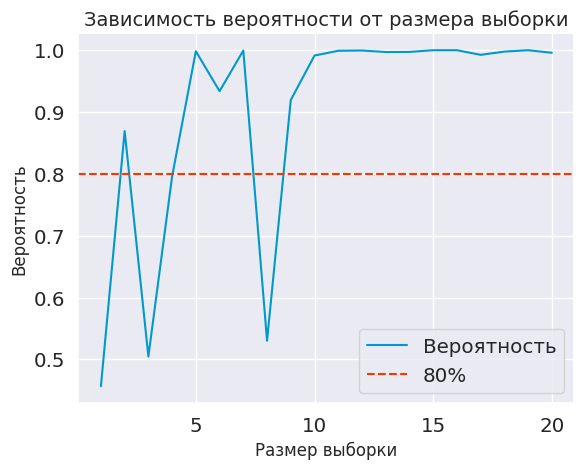

In [186]:
plot_probability_vs_sample_size(sizes, probs, threshold=0.8, threshold_label="80%", title="Зависимость вероятности от размера выборки")

нужно примерно 3-4 элемнта выборки

Как меняется требуемый размер выборки если в реализации критерия использовать распределение Стьюдента? Используйте для этого первую реализацию критерия с занятия.

In [187]:
presample = generate_student_t(size=size, loc=loc, scale=scale, df=5)
hist_loc = presample.mean()
hist_scale = np.sqrt(presample.var())

probs = []
sizes = np.linspace(1, 20, 20).astype(int)

for size in tqdm(sizes):
    sample_x = generate_student_t(size=size, loc=loc, scale=scale, df=5)
    sample_y = generate_student_t(size=size, loc=loc * (1 + effect), scale=scale, df=5)

    probs.append(
        bayesian_testing(
            prior_distr=partial(pm.Normal, mu=hist_loc, sigma=effect * hist_loc),
            sample_distr=partial(pm.StudentT, nu=5, sigma=hist_scale),
            shift_parameter="mu",
            sample_x=sample_x,
            sample_y=sample_y,
            draw_trace=False,
            draw_posterior=False,
            returns=["theta_1<theta_2"],
        )[0]
    )

  0%|          | 0/20 [00:00<?, ?it/s]

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_1, theta_2]
Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 5 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_1, theta_2]
Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 5 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_1, theta_2]
Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 5 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_1, theta_2]
Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 4 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_1, theta_2]
Sampling 4 chains for 500 tune 

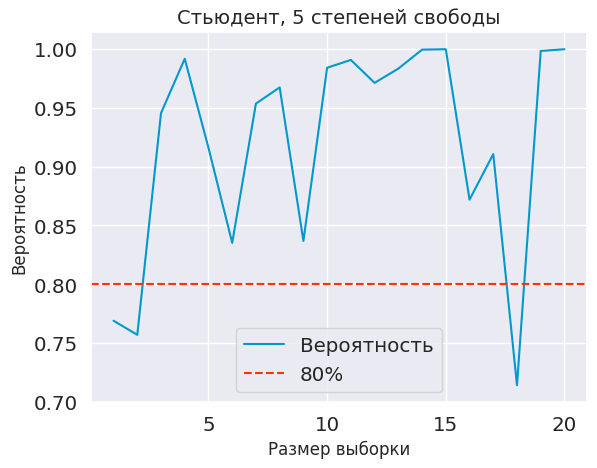

In [188]:
plot_probability_vs_sample_size(sizes, probs, title="Стьюдент, 5 степеней свободы")

видим, что нужно примерно 4-5 элементов выборки

Исследуйте зависимость $\mathsf{P}(\theta_1 < \theta_2\ |\ X, Y)$ от истинного эффекта если данные сгенерированны из распределения Стьюдента, а критерий использует нормальное распределение.

In [189]:
grid = np.linspace(-effect, effect, 20)
probs = []
x_sample = generate_student_t(size=1000, loc=loc, df=5)
y_sample = generate_student_t(size=1000, loc=loc, df=5)

for real_effect in tqdm(grid):
    probs.append(
            bayesian_testing(
            prior_distr=partial(pm.Normal, mu=hist_loc, sigma=effect*hist_loc),
            sample_distr=partial(pm.Normal, sigma=hist_scale),
            shift_parameter='mu',
            sample_x=sample_x, sample_y=sample_y*(1 + real_effect),
            draw_trace=False, draw_posterior=False,
            returns=['theta_1<theta_2']
        )[0]
    )


  0%|          | 0/20 [00:00<?, ?it/s]

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_1, theta_2]
Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 5 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_1, theta_2]
Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 5 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_1, theta_2]
Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 5 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_1, theta_2]
Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 4 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_1, theta_2]
Sampling 4 chains for 500 tune 

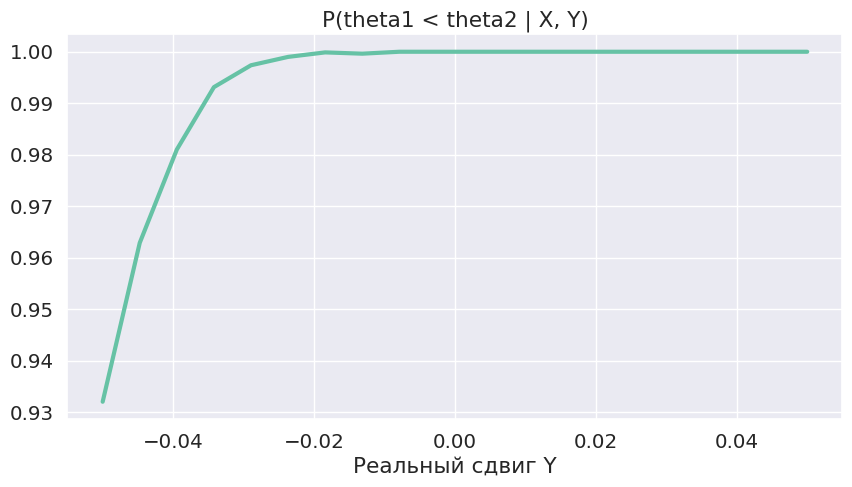

In [190]:
plt.figure(figsize=(10, 5))
plt.title('P(theta1 < theta2 | X, Y)')
plt.plot(grid, probs, lw=3)
plt.xlabel('Реальный сдвиг Y')
plt.show()

**Выводы:**

Мы успешно исследовали, что замена нормального распределения на распределение Стьюдента делает необходимым увеличение выборки для получения значимого эффекта. А также вероятность отвергнуть гипотезу становится более пологой по сравнению с нормальным случаем.

---
### Задача 5.

В Долгопрудном крупная торговая сеть имеет $100$ магазинов и планирует открыть еще $5$ магазинов. 

Первый этап &mdash; выбор места для открытия нового магазина среди множества потенциальных вариантов. Для этого аналитики компании построили ML-модель, которая на основе существующего множества магазинов предсказывает ожидаемую выручку магазина на основе различных географических факторов: плотность населения в некотором радиусе, величина пешеходного и транспортного потока, наличие рядом торговых центров и иных магазинов. Модель также оценивает степень уверенности в своем прогнозе.

Отлично, мы выбрали место для нового магазина, подготовились к окрытию и... открыли! Второй этап &mdash; оценка реальной успешности магазина. Но, поскольку магазин новый, он не сразу показывает ожидаемые значения выручки. В реальности выход магазина к ожидаемым показателям может занимать до 12-14 месяцев. Тем самым, такую оценку можно произвести в лучшем случае через год после открытия.

Тем не менее, спустя полгода работы можно прикинуть, достигнет ли магазин ожидаемых показателей. Если есть негативные опасения, то стоит проанализовать работу магазина. Возможно, его недостаточно прорекламировали, а может быть покупателям в нем что-то не понравилось.

Для составления прогноза на основе данных за каждый полгода можно спрогнозировать тренд роста выручки, а также можно использовать прогнозы ML-модели в качестве априорной информации. 

Предполагается, что тренд роста выручки магазина в первый год можно приближенно описать формулой
$$y_t = y_{\infty}\left[(1 - \gamma) \left( 1 - e^{-kt}\right) + \gamma\right] + \varepsilon_t,$$
где $y_{\infty}$ &mdash; ожидаемая выручка магазина в пределе, $\gamma \in (0, 1)$ &mdash; коэффициент выручки с первого месяца работы по отношению к предельному, $k \in [1/6, 1/4]$ &mdash; параметр формы кривой, $t$ &mdash; номер месяца с момента открытия (нумерация с 1), $\varepsilon_t$ &mdash; случайный шум. 

Подберите параметры априорного распределения выручки в пределе так, чтобы его математическое ожидание было равно ожидаемой выручке согласно ML-модели, а дисперсия опредялась степенью уверенности модели. Не берите слишком маленькую дисперсию, даже самое уверенное предсказание имеет погрешность не менее 10%. В качестве априорных распределений $\gamma$ и $k$ возьмите равномерные на соответствующей области значений. Априорное распределение шума выберите нормальным с нулевым средним и некоторой дисперсией, на которую тоже можно задать априорное распределение.

С помощью PyMC для каждого магазина постройте семплы из апостериорных распределений параметров $y_{\infty}, \gamma, k$. Далее по формуле тренда роста выручки получите семпл ожидаемой выручки через год после открытия для каждого магазина. Наконец, оцените вероятность того, что через год после открытия магазин достигнет уровня 80%, 90%, 100% от своей ожидаемой выручки.

In [191]:
# ожидаемая выручка согласно ML-модели
expected = [92700, 212800, 49700, 80000, 462500]
# степень уверенности ML-модели
confidence = [0.92, 0.96, 0.76, 0.62, 0.48]

data = pd.DataFrame(
    [[ 47580.07,  68817.26,  61583.18,  28341.77, 355656.42],
     [ 59487.94,  78042.15,  68282.65,  29684.57, 397649.98],
     [ 74656.72, 105193.11,  71588.68,  35201.27, 399673.09],
     [ 69145.22, 138103.96,  69242.53,  35444.95, 413788.36],
     [ 73360.78, 134696.74,  78585.76,  34829.87, 423585.50],
     [ 78408.82, 152144.24,  73533.09,  36262.02, 452980.44]],
    index=range(0, 6)
)
data.columns.name = 'shops'
data.index.name = 'months'
months = np.arange(0, 6)

data

shops,0,1,2,3,4
months,,,,,
0,47580.07,68817.26,61583.18,28341.77,355656.42
1,59487.94,78042.15,68282.65,29684.57,397649.98
2,74656.72,105193.11,71588.68,35201.27,399673.09
3,69145.22,138103.96,69242.53,35444.95,413788.36
4,73360.78,134696.74,78585.76,34829.87,423585.50
5,78408.82,152144.24,73533.09,36262.02,452980.44


In [192]:
def calculate_probabilities(index, data, expected, confidence, months):
    with pm.Model() as model:
        gamma_ = pm.Uniform("gamma", lower=0, upper=1)
        k_ = pm.Uniform("k", lower=1 / 6, upper=1 / 4)
        y_aprior = pm.Normal(
            "aprior",
            mu=expected[index],
            sigma=np.max([expected[index] * 0.1, (1 - confidence[index]) * expected[index]])
        )
        epsilon_t = pm.Normal("Noise", mu=0, sigma=y_aprior * 0.1)

        y_t = pm.Normal(
            "y_t",
            mu=y_aprior * ((1 - gamma_) * (1 - np.exp(-k_ * months)) + gamma_),
            sigma=epsilon_t,
            observed=data.iloc[:, index]
        )

        trace = pm.sample(cores=4, target_accept=0.8, progressbar=True)

    y_inf_poster = trace.posterior["aprior"]
    gamma_poster = trace.posterior["gamma"]
    k_poster = trace.posterior["k"]
    sigma_t = trace.posterior["Noise"]

    final_result = y_inf_poster * ((1 - gamma_poster) * (1 - np.exp(-k_poster * 12)) + gamma_poster) + sigma_t

    prob_80 = np.mean(final_result > 0.8 * expected[index]).item()
    prob_90 = np.mean(final_result > 0.9 * expected[index]).item()
    prob_100 = np.mean(final_result > expected[index]).item()

    # Calculate statistics
    mean_value = final_result.mean().item()
    std = np.sqrt(final_result.var().item())
    expectation = expected[index]
    estimated_std = (1 - confidence[index]) * expectation

    return pd.DataFrame({
        "Probability >= 80%": [round(prob_80, 3)],
        "Probability >= 90%": [round(prob_90, 3)],
        "Probability >= 100%": [round(prob_100, 3)],
        "Mean Value": [round(mean_value, 3)],
        "Variance": [round(std, 3)],
        "Expectation": [round(expectation, 3)],
        "Estimated Variance": [round(estimated_std, 3)]
    })


In [193]:
dfs = []
for i in range(5):
    tmp_df = calculate_probabilities(i, data, expected, confidence, months)
    dfs.append(tmp_df)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gamma, k, aprior, Noise]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gamma, k, aprior, Noise]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gamma, k, aprior, Noise]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gamma, k, aprior, Noise]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gamma, k, aprior, Noise]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


In [194]:
result_df = pd.concat(dfs, ignore_index=True)
result_df.index = result_df.index + 1
result_df.index.name = "shop"
result_df

,Probability >= 80%,Probability >= 90%,Probability >= 100%,Mean Value,Variance,Expectation,Estimated Variance
shop,,,,,,,
1,1.000,0.993,0.718,95970.729,5446.370,92700,7416.0
2,1.000,0.839,0.191,202826.656,12086.995,212800,8512.0
3,1.000,1.000,1.000,81307.556,4092.600,49700,11928.0
4,0.001,0.000,0.000,42461.374,2779.617,80000,30400.0
5,1.000,1.000,0.959,491571.166,20810.847,462500,240500.0


**Выводы:**

Как видим, только 4 магазин скорее всего не выйдет на планируемые показатели. 

Заметим, что прогнозируемое стандартное отклонение вы выручке не сильно отличается от ожидаемой.

Таким образом, нам при помощи PyMC удалось спрогнозировать выручку магазинов.